# Step 1: Load and Inspect Data

In [1]:
# Import necessary libraries
import pandas as pd

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Inspect the data
print("Train Data Overview:")
print(train_data.info())

# Set display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Adjust display width
pd.set_option('display.max_colwidth', 50)   # Set max column width

# Show the first 10 rows of the DataFrame for better understanding
print(train_data.head(10))

print("\nTest Data Overview:")
print(test_data.info())

# Set display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Adjust display width
pd.set_option('display.max_colwidth', 50)   # Set max column width

# Show the first 10 rows of the DataFrame for better understanding
print(test_data.head(10))


Train Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50

# Step 2: Data Preprocessing

In [2]:
# Check for missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Missing Values in Test Data:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


In [3]:
# Fill missing values with appropriate strategies
train_data['Product_Category_2'].fillna(train_data['Product_Category_2'].median(), inplace=True)
train_data['Product_Category_3'].fillna(train_data['Product_Category_3'].median(), inplace=True)

test_data['Product_Category_2'].fillna(test_data['Product_Category_2'].median(), inplace=True)
test_data['Product_Category_3'].fillna(test_data['Product_Category_3'].median(), inplace=True)

<ipython-input-3-f529456fd12e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product_Category_2'].fillna(train_data['Product_Category_2'].median(), inplace=True)
<ipython-input-3-f529456fd12e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [4]:
# Check for now missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Missing Values in Test Data:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64


In [5]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

The categorical columns (Gender, Age, City_Category, and Stay_In_Current_City_Years) contain non-numeric data that needs to be converted into numeric form to feed into machine learning models. LabelEncoder is used to transform these categorical values into numerical codes.

# Step 3: Exploratory Data Analysis (EDA)

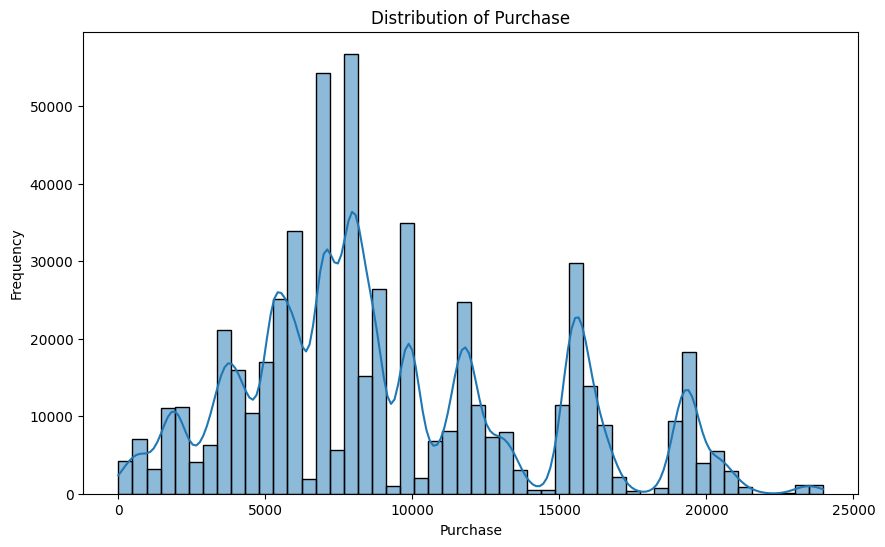

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Purchase'], bins=50, kde=True)
plt.title('Distribution of Purchase')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.show()


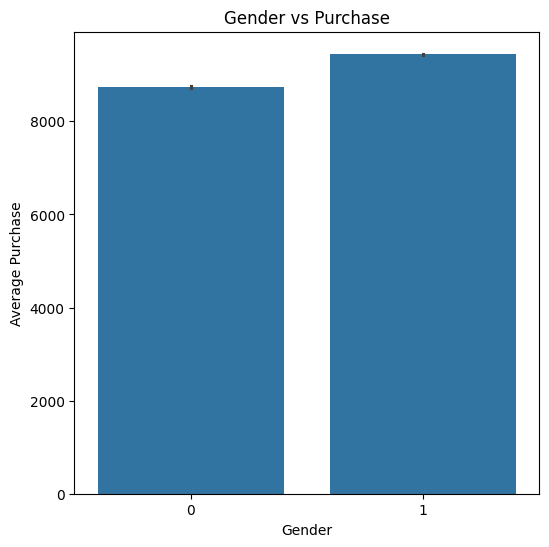

In [7]:
# Analyze Gender vs Purchase
plt.figure(figsize=(6,6))
sns.barplot(x='Gender', y='Purchase', data=train_data)
plt.title('Gender vs Purchase')
plt.xlabel('Gender')
plt.ylabel('Average Purchase')
plt.show()


Male- 1
Female-0

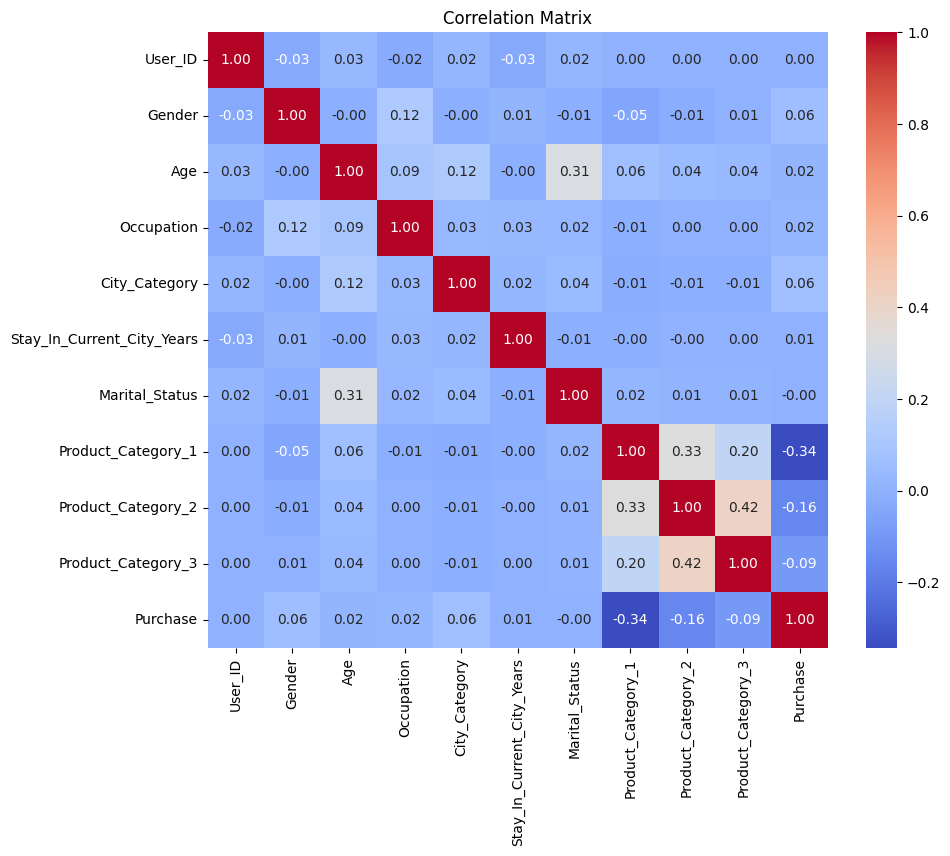

In [8]:
# Analyze correlations between numeric variables
plt.figure(figsize=(10, 8))

# Exclude non-numeric columns for correlation calculation
numeric_columns = train_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Step 4: Feature Engineering

Feature engineering is the process of selecting, modifying, or creating new features from raw data to improve a machine learning model's performance.

In [9]:
# Create new features if necessary
train_data['Total_Product_Category'] = train_data['Product_Category_1'] + train_data['Product_Category_2'] + train_data['Product_Category_3']
test_data['Total_Product_Category'] = test_data['Product_Category_1'] + test_data['Product_Category_2'] + test_data['Product_Category_3']

# Step 5: Model Training and Evaluation

In [10]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [12]:
import sklearn
print(sklearn.__version__)


1.6.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
X = train_data.drop(columns=['Purchase', 'User_ID', 'Product_ID'])
y = train_data['Purchase']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Validate the model
y_pred = rf.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Validation RMSE: {rmse}")

TypeError: got an unexpected keyword argument 'squared'

The error suggests that there might still be an issue with how the mean_squared_error function is being called or the version of scikit-learn in use. Even though squared is supported in recent versions, it may not be recognized due to an environment issue.

In [13]:
import numpy as np

y_val = np.array(y_val)
y_pred = np.array(y_pred)


Debug Data Types:
The y_val and y_pred variables might not be compatible data types (e.g., one is a NumPy array and the other is a pandas Series). Convert both to NumPy arrays



In [16]:
# Therefore, Avoid Using the squared Parameter
from sklearn.metrics import mean_squared_error

# Calculate MSE first
mse = mean_squared_error(y_val, y_pred)

# Convert MSE to RMSE
rmse = mse ** 0.5
print(f"Validation RMSE: {rmse}")


Validation RMSE: 3062.207202479015


# Step 6: Predictions on Test Data


In [18]:
X_test = test_data.drop(columns=['User_ID', 'Product_ID'])

test_data['Purchase'] = rf.predict(X_test)

# Save predictions
test_data[['User_ID', 'Product_ID', 'Purchase']].to_csv('submission.csv', index=False)